In [14]:
import sys
import re
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/poreC/data/VCFs/test.table"
df = pd.read_csv(fpath, sep='\t')
df.head()

/tmp/ipykernel_2417108/1869835992.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fpath, sep='\t')


,CHROM,POS,REF,ALT,129S1_SvImJ.GT,129S1_SvImJ.AD,129S1_SvImJ.DP,129S1_SvImJ.GQ,129S1_SvImJ.PL,129S1_SvImJ.SAMPLE,CAST_EiJ.GT,CAST_EiJ.AD,CAST_EiJ.DP,CAST_EiJ.GQ,CAST_EiJ.PL,CAST_EiJ.SAMPLE
0,1,3050050,C,G,C/C,"36,0",36,122,"0,108,255",NaN,C/C,"54,0",54,127,"0,163,255",NaN
1,1,3050069,C,T,T/T,"0,40",40,115,"255,120,0",NaN,C/T,"28,27",55,127,"179,0,226",NaN
2,1,3050076,C,T,C/C,"39,0",39,127,"0,117,255",NaN,C/C,"54,0",54,127,"0,163,255",NaN
3,1,3050115,G,A,G/G,"45,0",45,127,"0,135,255",NaN,G/G,"64,0",64,127,"0,193,255",NaN
4,1,3050118,G,A,G/G,"45,0",45,127,"0,135,255",NaN,G/G,"62,0",62,127,"0,187,255",NaN


In [18]:
def load_snps_table(fpath, sample_name):
    df = pd.read_csv(fpath, sep="\t", low_memory=False)
    print(f"{df.shape=}")
    print(f"{df.columns=}")

    # reformat
    df.columns = ['chrom', 'position', 'ref', 'alt', 'sample']
    df['alleles'] = df['sample'].apply(lambda x: x.replace(f"{sample_name}=", ""))
    allele_map = {
        '0/0' : 'ref_homozygous',
        '0/1' : 'heterozygous',
        '1/1' : 'alt_homozygous',
    }
    
    df['genotype'] = df['alleles'].map(allele_map)
    return df


sample_name = '129S1_SvImJ'
fpath = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/snps/{sample_name}.snps.tsv"
df1 = load_snps_table(fpath, sample_name)

sample_name = 'CATE0J'
fpath = f"/scratch/indikar_root/indikar1/cstansbu/scpc_test/snps/{sample_name}.snps.tsv"
df2 = load_snps_table(fpath, sample_name)

df = pd.concat([df1, df2])
df.head()

df.shape=(83212162, 5)
df.columns=Index(['# [1]CHROM', '[2]POS', '[3]REF', '[4]ALT',
       '[5]SAMPLE=[6]129S1_SvImJ:GT'],
      dtype='object')


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/indikar_root/indikar1/cstansbu/scpc_test/snps/CATE0J.snps.tsv'

# variant level statistics

<AxesSubplot: xlabel='chrom', ylabel='count'>

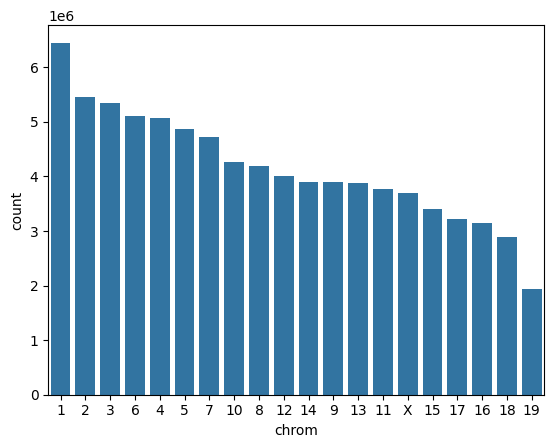

In [17]:
sns.barplot(df2['chrom'].value_counts())